## Forecasting CPI

This is a Jupyter Notebook that depicts forecasting of CPI for 3 months.  

The OSEMN methodology will be employed and 3 models which inlcudes Autoregressive, Linear regression with Lasso regularization and Random forest will be employed to forecast CPI which is a measure of inflation

### Import Related Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## Obtain the Data

In [2]:
rawdata = pd.read_excel("C:/Users/faisa/Downloads/Task 3.xlsx")

In [3]:
rawdata.head()

,Series Name,type,unit_type,2021-12-01 00:00:00,2021-11-01 00:00:00,2021-10-01 00:00:00,2021-09-01 00:00:00,2021-08-01 00:00:00,2021-07-01 00:00:00,2021-06-01 00:00:00,...,2017-10-01 00:00:00,2017-09-01 00:00:00,2017-08-01 00:00:00,2017-07-01 00:00:00,2017-06-01 00:00:00,2017-05-01 00:00:00,2017-04-01 00:00:00,2017-03-01 00:00:00,2017-02-01 00:00:00,2017-01-01 00:00:00
0,Consumer Price Index (CPI),Target,2002=100,NaN,NaN,NaN,143.100,142.500,141.700,141.000,...,130.90,130.700,130.400,130.100,129.900,129.900,130.100,129.700,129.900,130.100
1,Policy Rate: Overnight Target Rate,Feature,% pa,0.250,0.250,0.250,0.250,0.250,0.250,0.250,...,1.00,1.000,0.750,0.750,0.500,0.500,0.500,0.500,0.500,0.500
2,Retail Sales,Feature,CAD mn,57919.779,58750.669,58218.955,57201.326,57699.143,56785.108,56792.174,...,50410.33,49008.765,49071.782,49015.122,48931.942,48892.363,48989.825,48131.622,48022.072,48568.234
3,Purchasing Manager Index (PMI),Feature,NaN,45.000,61.200,59.300,70.400,66.000,56.400,71.900,...,63.80,59.600,56.300,60.000,61.600,53.800,62.400,61.100,55.000,57.200
4,Total Imports,Feature,CAD mn,58573.500,56110.100,54481.600,51927.800,52848.100,52797.500,51627.100,...,46322.40,46931.000,46485.600,46754.800,49270.400,49569.300,48440.800,47440.700,47370.900,47072.300


## Scrub the Data

In [4]:
# The data has to be transformed from a horizontal table into a vertical table with the type and unit_type columns dropped.
# In addition, the order of the rows will be arranged from past dates to more recent dates.
data = rawdata.copy()

# Drop type and unit type features
data = data.drop(['type','unit_type'], axis = 1 )
data.head(1)

,Series Name,2021-12-01 00:00:00,2021-11-01 00:00:00,2021-10-01 00:00:00,2021-09-01 00:00:00,2021-08-01 00:00:00,2021-07-01 00:00:00,2021-06-01 00:00:00,2021-05-01 00:00:00,2021-04-01 00:00:00,...,2017-10-01 00:00:00,2017-09-01 00:00:00,2017-08-01 00:00:00,2017-07-01 00:00:00,2017-06-01 00:00:00,2017-05-01 00:00:00,2017-04-01 00:00:00,2017-03-01 00:00:00,2017-02-01 00:00:00,2017-01-01 00:00:00
0,Consumer Price Index (CPI),NaN,NaN,NaN,143.1,142.5,141.7,141.0,140.6,140.1,...,130.9,130.7,130.4,130.1,129.9,129.9,130.1,129.7,129.9,130.1


In [5]:
# Transposing the dataframe
datavertical = data.transpose()
datavertical.head()

,0,1,2,3,4,5,6,7,8,9,10,11
Series Name,Consumer Price Index (CPI),Policy Rate: Overnight Target Rate,Retail Sales,Purchasing Manager Index (PMI),Total Imports,Total Exports,Gross Money Supply (M2),Retail Sales of Motor Vehicle & Parts Dealers,Foreign Currency Reserves,Employment,Industrial Production Index,Gasoline Price (Simple Average)
2021-12-01 00:00:00,NaN,0.25,57919.779,45.0,58573.5,56993.9,2312111.0,16034.363,78149.0,19376.2,118.01,1.406
2021-11-01 00:00:00,NaN,0.25,58750.669,61.2,56110.1,58215.9,2308282.0,15632.744,75136.0,19297.6,123.32,1.468
2021-10-01 00:00:00,NaN,0.25,58218.955,59.3,54481.6,56400.7,2286369.0,15601.186,75472.0,19141.8,119.22,1.464
2021-09-01 00:00:00,143.1,0.25,57201.326,70.4,51927.8,52677.3,2278784.0,15200.913,77935.0,19121.8,117.38,1.402


In [6]:
# Renaming the column indexes, get list of columns
list(datavertical.iloc[0,])

['Consumer Price Index (CPI)',
 'Policy Rate: Overnight Target Rate',
 'Retail Sales',
 'Purchasing Manager Index (PMI)',
 'Total Imports',
 'Total Exports',
 'Gross Money Supply (M2)',
 'Retail Sales of Motor Vehicle & Parts Dealers',
 'Foreign Currency Reserves',
 'Employment',
 'Industrial Production Index',
 'Gasoline Price (Simple Average)']

In [7]:
# Renaming the columns
datavertical.columns = ['Consumer Price Index (CPI)',
 'Policy Rate: Overnight Target Rate',
 'Retail Sales',
 'Purchasing Manager Index (PMI)',
 'Total Imports',
 'Total Exports',
 'Gross Money Supply (M2)',
 'Retail Sales of Motor Vehicle & Parts Dealers',
 'Foreign Currency Reserves',
 'Employment',
 'Industrial Production Index',
 'Gasoline Price (Simple Average)']

# Dropping first row
datavertical = datavertical.drop(labels='Series Name', axis=0)

In [8]:
# Sanity Check
datavertical.head()

,Consumer Price Index (CPI),Policy Rate: Overnight Target Rate,Retail Sales,Purchasing Manager Index (PMI),Total Imports,Total Exports,Gross Money Supply (M2),Retail Sales of Motor Vehicle & Parts Dealers,Foreign Currency Reserves,Employment,Industrial Production Index,Gasoline Price (Simple Average)
2021-12-01 00:00:00,NaN,0.25,57919.779,45.0,58573.5,56993.9,2312111.0,16034.363,78149.0,19376.2,118.01,1.406
2021-11-01 00:00:00,NaN,0.25,58750.669,61.2,56110.1,58215.9,2308282.0,15632.744,75136.0,19297.6,123.32,1.468
2021-10-01 00:00:00,NaN,0.25,58218.955,59.3,54481.6,56400.7,2286369.0,15601.186,75472.0,19141.8,119.22,1.464
2021-09-01 00:00:00,143.1,0.25,57201.326,70.4,51927.8,52677.3,2278784.0,15200.913,77935.0,19121.8,117.38,1.402
2021-08-01 00:00:00,142.5,0.25,57699.143,66.0,52848.1,53933.8,2276124.0,15668.624,77961.0,18947.3,116.79,1.398


In [9]:
# Reversing the order of rows so that observations are increasing with respect to time
datavertical = datavertical.iloc[::-1]
datavertical

,Consumer Price Index (CPI),Policy Rate: Overnight Target Rate,Retail Sales,Purchasing Manager Index (PMI),Total Imports,Total Exports,Gross Money Supply (M2),Retail Sales of Motor Vehicle & Parts Dealers,Foreign Currency Reserves,Employment,Industrial Production Index,Gasoline Price (Simple Average)
2017-01-01 00:00:00,130.1,0.5,48568.234,57.2,47072.3,46977.1,1515535.0,13289.364,74927.0,18133.3,116.59,1.131
2017-02-01 00:00:00,129.9,0.5,48022.072,55.0,47370.9,46110.4,1515227.0,12813.538,72294.0,18147.0,119.63,1.08
2017-03-01 00:00:00,129.7,0.5,48131.622,61.1,47440.7,46769.3,1524489.0,13095.517,72731.0,18163.4,118.02,1.078
2017-04-01 00:00:00,130.1,0.5,48989.825,62.4,48440.8,47390.3,1536201.0,13240.328,74789.0,18182.3,112.42,1.152
2017-05-01 00:00:00,129.9,0.5,48892.363,53.8,49569.3,47988.4,1549576.0,13426.333,75576.0,18235.2,113.34,1.117
2017-06-01 00:00:00,129.9,0.5,48931.942,61.6,49270.4,45712.0,1551734.0,13247.262,74634.0,18269.1,115.96,1.078
2017-07-01 00:00:00,130.1,0.75,49015.122,60.0,46754.8,43807.0,1554230.0,13363.573,74868.0,18290.6,112.98,1.068
2017-08-01 00:00:00,130.4,0.75,49071.782,56.3,46485.6,43560.1,1550989.0,13466.952,75025.0,18335.7,116.38,1.101
2017-09-01 00:00:00,130.7,1.0,49008.765,59.6,46931.0,43763.8,1558377.0,13199.673,74262.0,18332.8,117.41,1.172
2017-10-01 00:00:00,130.9,1.0,50410.33,63.8,46322.4,44638.0,1565900.0,14311.02,73415.0,18371.2,116.85,1.12


## Exploring the Data

In [10]:
# Assigning new object for prepped data
dataprepped = datavertical.copy()

In [11]:
# Check if there are any NAs apart from the 3 latest CPI values.

NA = dataprepped.isna().sum()
total = dataprepped.isna().sum().sum()
print('Total missing data:', total)
print(NA)

Total missing data: 3
Consumer Price Index (CPI)                       3
Policy Rate: Overnight Target Rate               0
Retail Sales                                     0
Purchasing Manager Index (PMI)                   0
Total Imports                                    0
Total Exports                                    0
Gross Money Supply (M2)                          0
Retail Sales of Motor Vehicle & Parts Dealers    0
Foreign Currency Reserves                        0
Employment                                       0
Industrial Production Index                      0
Gasoline Price (Simple Average)                  0
dtype: int64


In [12]:
dataprepped.info()

<class 'pandas.core.frame.DataFrame'>
Index: 60 entries, 2017-01-01 00:00:00 to 2021-12-01 00:00:00
Data columns (total 12 columns):
 #   Column                                         Non-Null Count  Dtype 
---  ------                                         --------------  ----- 
 0   Consumer Price Index (CPI)                     57 non-null     object
 1   Policy Rate: Overnight Target Rate             60 non-null     object
 2   Retail Sales                                   60 non-null     object
 3   Purchasing Manager Index (PMI)                 60 non-null     object
 4   Total Imports                                  60 non-null     object
 5   Total Exports                                  60 non-null     object
 6   Gross Money Supply (M2)                        60 non-null     object
 7   Retail Sales of Motor Vehicle & Parts Dealers  60 non-null     object
 8   Foreign Currency Reserves                      60 non-null     object
 9   Employment                           

In [13]:
# The data in the dataframe is of object type and has to be converted to float type
dataprepped = dataprepped.astype('float')
print(dataprepped.info())

<class 'pandas.core.frame.DataFrame'>
Index: 60 entries, 2017-01-01 00:00:00 to 2021-12-01 00:00:00
Data columns (total 12 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Consumer Price Index (CPI)                     57 non-null     float64
 1   Policy Rate: Overnight Target Rate             60 non-null     float64
 2   Retail Sales                                   60 non-null     float64
 3   Purchasing Manager Index (PMI)                 60 non-null     float64
 4   Total Imports                                  60 non-null     float64
 5   Total Exports                                  60 non-null     float64
 6   Gross Money Supply (M2)                        60 non-null     float64
 7   Retail Sales of Motor Vehicle & Parts Dealers  60 non-null     float64
 8   Foreign Currency Reserves                      60 non-null     float64
 9   Employment                

In [14]:
# Check the statistical properties of the data
dataprepped.describe().round(2)

,Consumer Price Index (CPI),Policy Rate: Overnight Target Rate,Retail Sales,Purchasing Manager Index (PMI),Total Imports,Total Exports,Gross Money Supply (M2),Retail Sales of Motor Vehicle & Parts Dealers,Foreign Currency Reserves,Employment,Industrial Production Index,Gasoline Price (Simple Average)
count,57.00,60.00,60.00,60.00,60.00,60.00,60.00,60.00,60.00,60.00,60.00,60.00
mean,135.20,0.93,51700.82,57.08,49862.44,48182.79,1826896.45,13847.04,74563.42,18541.77,117.30,1.18
std,3.47,0.64,3828.86,9.01,3377.68,4392.93,264568.88,1674.53,2144.88,567.63,5.99,0.14
min,129.70,0.25,35195.87,22.80,36405.50,31707.40,1515227.00,5082.73,70253.00,16145.80,94.92,0.78
25%,132.70,0.25,50033.18,54.18,48817.68,46311.02,1601797.75,13466.22,73220.50,18334.97,115.48,1.08
50%,135.60,0.88,51298.85,58.75,50344.60,48214.75,1725488.00,13897.62,74748.50,18555.15,118.02,1.17
75%,137.30,1.75,53420.62,61.80,51567.02,50268.20,2081388.75,14388.37,76107.75,18951.95,120.98,1.30
max,143.10,1.75,58750.67,72.90,58573.50,58215.90,2312111.00,16034.36,78480.00,19376.20,127.10,1.47


In [15]:
# Checking for correlations in data filtering for high correlations
cordata = dataprepped.corr().round(2)
# cordata
cordata[(cordata > 0.75) | (cordata < -0.75)] # for more than |0.75|

,Consumer Price Index (CPI),Policy Rate: Overnight Target Rate,Retail Sales,Purchasing Manager Index (PMI),Total Imports,Total Exports,Gross Money Supply (M2),Retail Sales of Motor Vehicle & Parts Dealers,Foreign Currency Reserves,Employment,Industrial Production Index,Gasoline Price (Simple Average)
Consumer Price Index (CPI),1.00,NaN,NaN,NaN,NaN,NaN,0.92,NaN,NaN,NaN,NaN,NaN
Policy Rate: Overnight Target Rate,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Retail Sales,NaN,NaN,1.00,NaN,NaN,0.77,NaN,0.92,NaN,NaN,NaN,NaN
Purchasing Manager Index (PMI),NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Total Imports,NaN,NaN,NaN,NaN,1.00,0.93,NaN,NaN,NaN,0.89,NaN,0.76
Total Exports,NaN,NaN,0.77,NaN,0.93,1.00,NaN,NaN,NaN,0.85,NaN,0.87
Gross Money Supply (M2),0.92,NaN,NaN,NaN,NaN,NaN,1.00,NaN,NaN,NaN,NaN,NaN
Retail Sales of Motor Vehicle & Parts Dealers,NaN,NaN,0.92,NaN,NaN,NaN,NaN,1.00,NaN,NaN,NaN,NaN
Foreign Currency Reserves,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
Employment,NaN,NaN,NaN,NaN,0.89,0.85,NaN,NaN,NaN,1.00,0.76,NaN


Based on the correlation analysis above, Gross Money Supply (M2) is significantly correlated to CPI with 0.92 and is likely a great predictor of CPI.  
Some of the predictor variables are also highly correlated among each other, example of this includes Retail Sales of Motor Vehicle & Parts Dealers and retail sales.  

Additional pre-processing is not performed to handle collinearity as the models are robust or not affected. Linear regression with Lasso penalizes the regression coefficient weights and handles collinearity. While random forest has feature selection integrated in its algorithm. The AR time-series model will only use lag variables of CPI as the predictor.

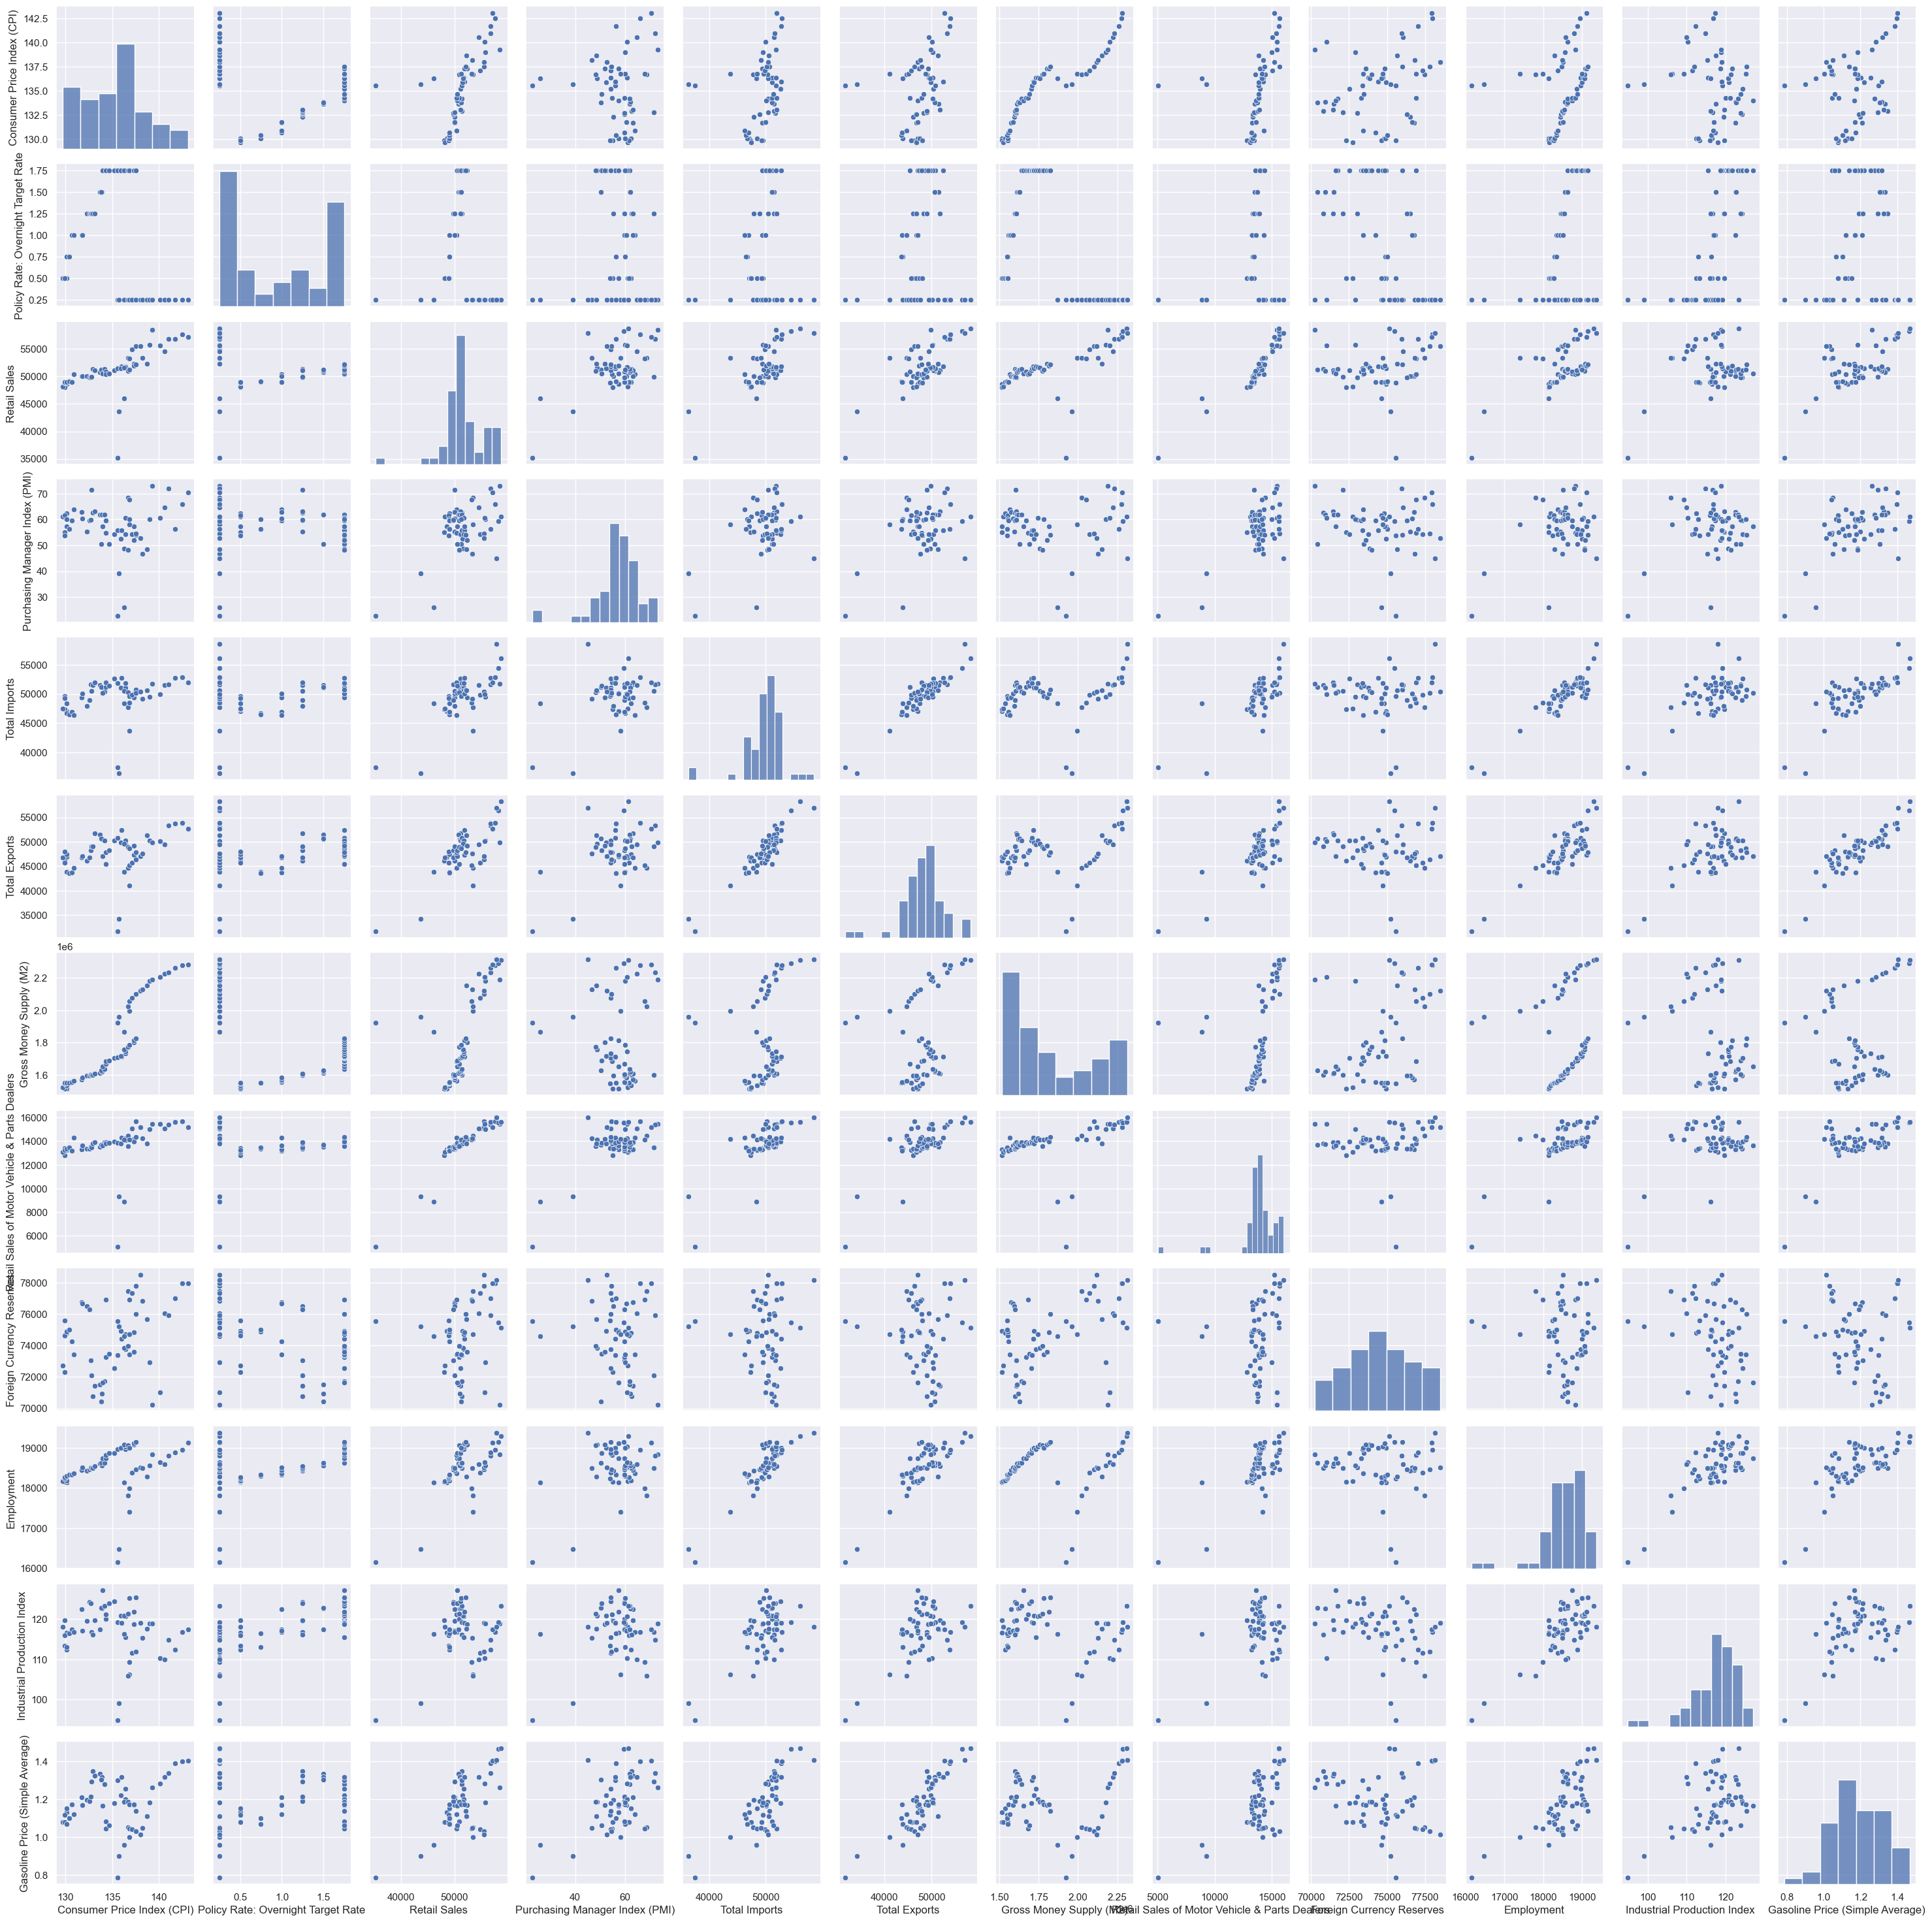

In [16]:
# Visualization of the variables plotted agaist each other and their distribution
sns.pairplot(dataprepped)
plt.show()

## Forecasting CPI 

The following sections will depict the preprocessing steps. For linear regression and RF, the data will be standardized prior modelling. For AR, the ADF test ( test of stationarity) will be perfromed and an appropriate lag value is determined.

The models used in this test includes:  
AutoRegressive Model
Linear Regression with Lasso  
Random Forest  

The rows with missing data, which are the last 3 rows will be ignored in the training and testing of the models. The best of the 3 models will be compared to each other and will be used to forecast the last 3 values of CPI.

In [17]:
# Dropping rows with missing CPI data
datanonan = dataprepped.dropna()
datanonan.tail()

,Consumer Price Index (CPI),Policy Rate: Overnight Target Rate,Retail Sales,Purchasing Manager Index (PMI),Total Imports,Total Exports,Gross Money Supply (M2),Retail Sales of Motor Vehicle & Parts Dealers,Foreign Currency Reserves,Employment,Industrial Production Index,Gasoline Price (Simple Average)
2021-05-01 00:00:00,140.6,0.25,54540.124,64.7,51477.9,49432.9,2222203.0,15051.063,76049.0,18584.8,110.01,1.318
2021-06-01 00:00:00,141.0,0.25,56792.174,71.9,51627.1,53310.9,2231058.0,15402.884,75938.0,18799.4,114.87,1.337
2021-07-01 00:00:00,141.7,0.25,56785.108,56.4,52797.5,53802.2,2260707.0,15632.741,77013.0,18879.5,112.32,1.388
2021-08-01 00:00:00,142.5,0.25,57699.143,66.0,52848.1,53933.8,2276124.0,15668.624,77961.0,18947.3,116.79,1.398
2021-09-01 00:00:00,143.1,0.25,57201.326,70.4,51927.8,52677.3,2278784.0,15200.913,77935.0,19121.8,117.38,1.402


## AutoRegressive Model

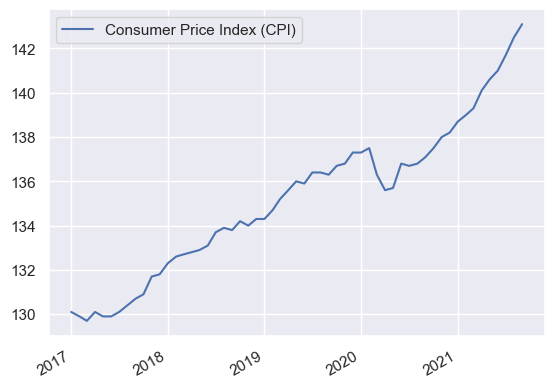

In [18]:
# Plotting of CPI
arcpi = datanonan["Consumer Price Index (CPI)"]
arcpi = arcpi.to_frame()
arcpi.plot()
plt.show()

Based on the CPI plot it appears that CPI has a linear relationship with respect to time, it increases steadily with the passage of time. It indicates that it is a non-stationary. An ADF test will be performed to check if it is indeed non-stationary

In [19]:
# ADF Test of Stationarity
from statsmodels.tsa.stattools import adfuller
result = adfuller(arcpi, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'n_lags: {result[1]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')  

ADF Statistic: 1.6544328967621962
n_lags: 0.9980120294229484
p-value: 0.9980120294229484
Critial Values:
   1%, -3.552928203580539
Critial Values:
   5%, -2.9147306250000002
Critial Values:
   10%, -2.595137155612245


The ADF test with a p-value of 0.99 fails to reject null hyphothesis, hence the data is non stationary.

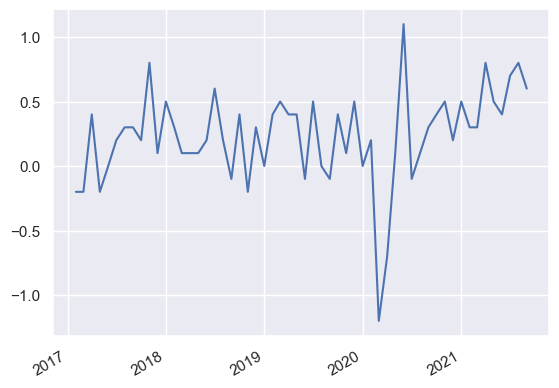

In [20]:
# The data will be transformed by differencing to become stationary 
arcpi['CPI Stationary'] = arcpi["Consumer Price Index (CPI)"] - arcpi["Consumer Price Index (CPI)"].shift(1)
arcpi['CPI Stationary'].plot()
plt.show()

In [21]:
# Checking the stationarity again using ADF test
cpistationary = arcpi['CPI Stationary'].dropna()
result = adfuller(cpistationary, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'n_lags: {result[1]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')  

ADF Statistic: -5.800016543677435
n_lags: 4.6545621652018e-07
p-value: 4.6545621652018e-07
Critial Values:
   1%, -3.5552728880540942
Critial Values:
   5%, -2.9157312396694217
Critial Values:
   10%, -2.5956695041322315


The data is now stationary as determined by the ADF test

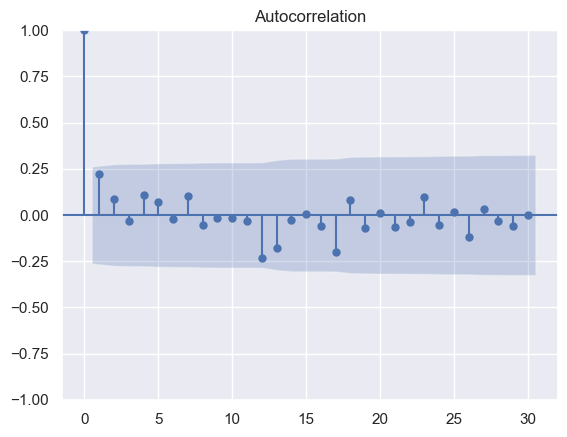

In [22]:
# Plotting the Autocorrelation of the transfromed CPI variable
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(cpistationary, lags=30)

# plot_acf(arcpi["Consumer Price Index (CPI)"], lags=30)

In [23]:
len(cpistationary)

56

In [24]:
# Split the data into train test sets, the dataset has 56 observations, 44 samples will be training while 12 
# will be for testing

train = cpistationary.iloc[:-12]
test = cpistationary.iloc[-12:]

In [25]:
# Training the model
from statsmodels.tsa.ar_model import AutoReg

ar_model = AutoReg(train, lags=1).fit()
print(ar_model.summary())

                            AutoReg Model Results                             
Dep. Variable:         CPI Stationary   No. Observations:                   44
Model:                     AutoReg(1)   Log Likelihood                 -17.628
Method:               Conditional MLE   S.D. of innovations              0.365
Date:                Mon, 23 Jan 2023   AIC                             41.255
Time:                        17:06:14   BIC                             46.539
Sample:                    03-01-2017   HQIC                            43.203
                         - 09-01-2020                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.1519      0.060      2.517      0.012       0.034       0.270
CPI Stationary.L1     0.0999      0.150      0.665      0.506      -0.195       0.394
                        

C:\Users\faisa\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [26]:
# Forecasting and evaluating the AR(1) model
from numpy import sqrt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

predictions = ar_model.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
for i in range(len(predictions)):
 print('predicted=%f, expected=%f' % (predictions[i], test[i]))

rmsear = sqrt(mean_squared_error(test, predictions))
maear = mean_absolute_error(test, predictions)
print('Test RMSE: %.3f' % rmsear)
print('Test MAE: %.3f' % maear)

predicted=0.181849, expected=0.400000
predicted=0.170043, expected=0.500000
predicted=0.168864, expected=0.200000
predicted=0.168746, expected=0.500000
predicted=0.168734, expected=0.300000
predicted=0.168733, expected=0.300000
predicted=0.168733, expected=0.800000
predicted=0.168733, expected=0.500000
predicted=0.168733, expected=0.400000
predicted=0.168733, expected=0.700000
predicted=0.168733, expected=0.800000
predicted=0.168733, expected=0.600000
Test RMSE: 0.380
Test MAE: 0.330


C:\Users\faisa\anaconda3\lib\site-packages\statsmodels\tsa\deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


In [27]:
# Dropping rows with missing CPI data
datanonan = dataprepped.dropna()
datanonan.tail()

,Consumer Price Index (CPI),Policy Rate: Overnight Target Rate,Retail Sales,Purchasing Manager Index (PMI),Total Imports,Total Exports,Gross Money Supply (M2),Retail Sales of Motor Vehicle & Parts Dealers,Foreign Currency Reserves,Employment,Industrial Production Index,Gasoline Price (Simple Average)
2021-05-01 00:00:00,140.6,0.25,54540.124,64.7,51477.9,49432.9,2222203.0,15051.063,76049.0,18584.8,110.01,1.318
2021-06-01 00:00:00,141.0,0.25,56792.174,71.9,51627.1,53310.9,2231058.0,15402.884,75938.0,18799.4,114.87,1.337
2021-07-01 00:00:00,141.7,0.25,56785.108,56.4,52797.5,53802.2,2260707.0,15632.741,77013.0,18879.5,112.32,1.388
2021-08-01 00:00:00,142.5,0.25,57699.143,66.0,52848.1,53933.8,2276124.0,15668.624,77961.0,18947.3,116.79,1.398
2021-09-01 00:00:00,143.1,0.25,57201.326,70.4,51927.8,52677.3,2278784.0,15200.913,77935.0,19121.8,117.38,1.402


## Lasso Regression and Random Forest

In [28]:
# Define features and label dataset
x = datanonan.drop(['Consumer Price Index (CPI)'], axis = 1)
y = datanonan['Consumer Price Index (CPI)']

In [29]:
# Standardize training features based on standard scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x)
scaled_x_train = scaler.transform(x)

In [30]:
# Create Models 
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor

Lasso = Lasso()
RF = RandomForestRegressor(n_estimators = 100, random_state = 0)


In [31]:
# Create parameters for timeseries split
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# cv = TimeSeriesSplit(n_splits=5)
cv = KFold(n_splits=10, shuffle=False)

The k-fold cross validation with no shuffling is chosen as the validation method. This is based off 
a paper by Cerqueira et al (2019) which found that blocked cross validation is a suitable method for time series analysis.

Reference  
Cerqueira, V., Torgo, L., & Mozetič, I. (2020). Evaluating time series forecasting models: an empirical study on performance estimation methods. Machine Learning, 109(11), 1997–2028. https://doi.org/10.1007/s10994-020-05910-7

In [32]:
# Cross validation for Lasso
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import absolute
from numpy import sqrt

scorelasso1 = cross_val_score(Lasso, scaled_x_train,y, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)
scorelasso2 = cross_val_score(Lasso, scaled_x_train,y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
print('Lasso RMSE:', sqrt(mean(absolute(scorelasso1))))
print('Lasso MAE:', mean(absolute(scorelasso2)))

Lasso RMSE: 2.1346511981962863
Lasso MAE: 1.6775056619158124


In [33]:
# Cross validation for Random Forest
scorerf1 = cross_val_score(RF, scaled_x_train,y, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)
scorerf2 = cross_val_score(RF, scaled_x_train,y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
print('RF RMSE:', sqrt(mean(absolute(scorerf1))))
print('RF MAE:', mean(absolute(scorerf2)))

RF RMSE: 1.2031239974887422
RF MAE: 0.896066666666667


## Normalizing RMSE and MAE of the 3 Models for Comparison

In [34]:
# The RMSE  and MAE for all models will be normalized based on the min and max values for the target and compared to each 
# other
min_lasso_rf_label = y.min()
max_lasso_rf_label = y.max()
rf_lasso_range = max_lasso_rf_label - min_lasso_rf_label

min_ar_label = cpistationary.min()
max_ar_label = cpistationary.max()
ar_range = max_ar_label - min_ar_label

rf_rmse_nor = sqrt(mean(absolute(scorerf1))) / rf_lasso_range
rf_mae_nor = mean(absolute(scorerf2)) / rf_lasso_range
lasso_rmse_nor = sqrt(mean(absolute(scorelasso1))) / rf_lasso_range
lasso_mae_nor = mean(absolute(scorelasso2)) / rf_lasso_range
ar_rmse_nor = rmsear / ar_range
ar_mae_nor = maear / ar_range

temp = {'Model' : ['AR','Lasso','RF'],
                  'RMSE'  : [ar_rmse_nor, lasso_rmse_nor, rf_rmse_nor ],
                  'MAE'   : [ar_mae_nor, lasso_mae_nor,rf_mae_nor ]}
model_summary = pd.DataFrame(temp)
model_summary

,Model,RMSE,MAE
0,AR,0.165088,0.143501
1,Lasso,0.159302,0.125187
2,RF,0.089785,0.066871


## Random forest is the selected model

As RF is the selected model, it will be trained using all samples and will be used to predict the 3 CPI values

In [35]:
# Training Random Forest
# Standardize training features based on standard scaler
from sklearn.preprocessing import StandardScaler
scaler2 = StandardScaler()
scaler2.fit(x)
scaled_x = scaler2.transform(x)

regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
regressor.fit(scaled_x, y) # training RF on all samples

RandomForestRegressor(random_state=0)

In [36]:
# Preparing scaled features for forecast of 3 CPI values
cpifeatures = dataprepped[-3:].drop(['Consumer Price Index (CPI)'], axis = 1)
scaled_x_forecast = scaler2.transform(cpifeatures)

## Forecasting the last 3 CPI values

In [37]:
# Forecasting 3 CPI values

forecast = regressor.predict(scaled_x_forecast)
forecast

array([141.906, 141.904, 142.343])

## Variables of importance to Random Forest Model

In [38]:
# The variables of importance are investigated through the use of feature_imporatances_

importance = regressor.feature_importances_
sorted_indices = np.argsort(importance)[::-1] 
feat_labels = x.columns
 
for f in range(x.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30,
                            feat_labels[sorted_indices[f]],
                            importance[sorted_indices[f]]))

 1) Gross Money Supply (M2)        0.870380
 2) Retail Sales                   0.033079
 3) Policy Rate: Overnight Target Rate 0.031073
 4) Employment                     0.015221
 5) Gasoline Price (Simple Average) 0.015207
 6) Retail Sales of Motor Vehicle & Parts Dealers 0.011088
 7) Total Imports                  0.008156
 8) Foreign Currency Reserves      0.005635
 9) Total Exports                  0.004399
10) Purchasing Manager Index (PMI) 0.003185
11) Industrial Production Index    0.002578


I am currently working on forecasting inflation using machine learning methods, it is my selected Data Science reserach project. Based on my literature review, variables of importance not included in the dataset includes currency exchange rates, stock market index, wage growth. 

The variables of importance however, may differ significantly depending on the nation of interest. Thus it would be advantegous to include as many related economic and financial variables as possible and then conduct PCA prior to using a non linear ML. This method is observed to generate accurate forecasts in the domain of macroeconomic forecasting.